In [1]:
import scipy
from scipy import misc
import glob
from PIL import Image
import matplotlib.pyplot as plt

from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

Using TensorFlow backend.
/home/student/.local/lib/python3.6/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


/home/student/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


Divertimento for viola and piano II Minuet_PROCESSED.wav


/home/student/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Notturno for Viola op 42 IV Adagio - Scherzo Allegro molto - Adagio_PROCESSED.wav
Bach_Viola_Concerto_PROCESSED.wav
Divertimento for viola and piano I Adagio_PROCESSED.wav
Viola Concerto in G Major-1st Mov_PROCESSED.wav
MÃ¤rchenbilder, Op_113 Nicht schnellPROCESSED.wav
[Iris Hur] Handel-Casadesus Viola Concerto 1st Movement_PROCESSED.wav
[Yoonah Park] Bach Viola Concerto in C minor 3rd movement_PROCESSED.wav
Sonata No. 3 in F Major I Adagio _processed.wav
[Yoonah Park] Bach Viola Concerto in C Minor 1st Movement_PROCESSED.wav
Notturno for Viola, op 42 II Adagio_PROCESSED.wav
Divertimento for viola and piano III Allegro di molto_PROCESSED.wav
FantasiestÃ¼cke Op 73 I Zart und mit Ausdruck_PROCESSED.wav
Viola Da Gamba_PROCESSED_PROCESSED.wav
Notturno for Viola, op 42 III Menuetto_PROCESSED.wav
Notturno for Viola op 42 III Menuetto Allegretto_PROCESSED.wav
Viola Sonata Op 105 a-moll I Mit leidenschaftlichem Ausdruck_PROCESSED.wav
Minuet No 3_PROCESSED.wav
Notturno for Viola op 42 I Marcia 

/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


viola sonata op 120 no 1 in F minor Andante Con Poco Adagio_PROCESSED.wav
Notturno for Viola, op 42 VII Marcia Allegro_PROCESSED.wav
Minuet No 1_PROCESSED.wav
FantasiestÃ¼cke, Op 73 II Lebhaft leicht_PROCESSED.wav
FantasiestÃ¼cke, Op_73 III Rasch und mit FeuerPROCESSED.wav
Viola Concerto in G Major-4th Mov_PROCESSED.wav
Sonata No. 3 in F MajorÂ III LargoPROCESSED.wav
Viola Concerto in G Major-2nd Mov_PROCESSED.wav
MÃ¤rchenbilder, Op 113 IV Langsam_PROCESSED.wav
Notturno for Viola, op 42 V Andante_PROCESSED.wav
Vivaldi - Sonata for Viola and Piano in B flat_PROCESSED.wav
Notturno for Viola op 42 VI Andante quasi Allegretto Allegro_PROCESSED.wav
Notturno for Viola, op 42 VI Andante_PROCESSED.wav
viola sonata op 120 no 1 in F minor Allegretto Grazioso_PROCESSED.wav
Vivaldi sonata in a minor (viola arr_PROCESSED.wav
Viola Sonata Op 105 a-moll III Lebhaft_PROCESSED.wav
Notturno for Viola, op 42 IV Adagio_PROCESSED.wav
viola sonata op 120 no 1 in F minor Vivace_PROCESSED.wav
MÃ¤rchenbilder, 

/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Sonata in B minor, BWV 1014 II - Allegro_PROCESSED.wav
Vivaldi Violin Concerto in E_PROCESSED.wav
Violin Sonata, L 140 II Intermede_PROCESSED.wav
Violin Sonata No 1 in D Op 12 No 1 III Rondo Allegro_PROCESSED.wav
Violin Sonata in G Minor, D 408 I Allegro giusto_PROCESSED.wav
Violin Sonata in A Minor, D 385 I Allegro moderato_PROCESSED.wav
Violin Sonata No 2 in A Op 12 No 2 II Andante piÃ¹ tosto allegretto_PROCESSED.wav
Sonata No 3 in D Minor Op 108 I Allegro_PROCESSED.wav
Violin Sonata No 1 in A minor Op 105  III Lebhaft_PROCESSED.wav
Violin Sonata No 2 in A Op 12 No 2 III Allegro piacevole_PROCESSED.wav
Violin Sonata in D major, D 384 III Allegro vivace_PROCESSED.wav
Sonata in B minor, BWV 1014 IV -Allegro_PROCESSED.wav
Violin Sonata in D major, D 384 II Andante_PROCESSED.wav
Sonata in G BWV 1019I - Allegro_PROCESSED.wav
Violin Sonata in A Major, D 574 II Scherzo Presto_PROCESSED.wav
Violin Sonata No 1 in D Op 12 No 1 I Allegro con brio_PROCESSED.wav
Romance in A Major Op 94 No 2 (Sch

<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

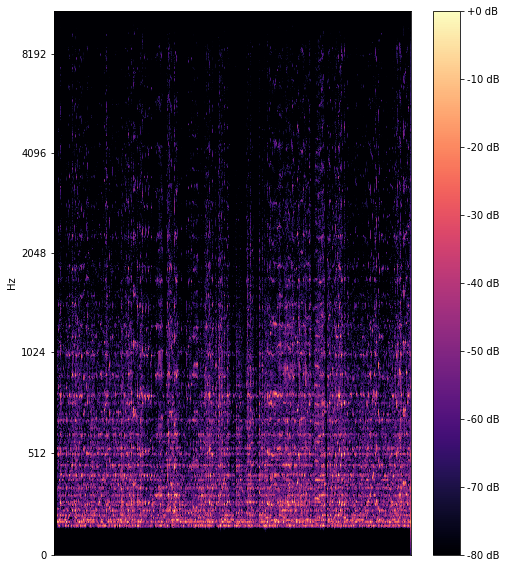

In [2]:
import os
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import numpy as np
import math
os.chdir('/home/student/Downloads/new_violin_viola/all/viola/combined_train')
x1=[]
y_train=[]
mfcc_list_mean = []
mfcc_list_std = []

freqViolin = []
freqViola = []
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/all/viola/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/all/train_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/all/violin/combined_train')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/all/violin/combined_train'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/all/train_combined/violin/{f_name[:-4]}.png')



Vivaldi Sonata No.5 in E Minor, Allegro, for Viola and Piano_PROCESSED.wav
Adagio and Allegro in A-Flat Major Op 70 Langsam mit innigem Ausdruck (Adagio)_PROCESSED.wav
Sonata No. 3 in F Major II Allegro_PROCESSED.wav
Violin Sonata No 21 in E minor K 304 I Allegro_PROCESSED.wav
MÃ¤rchenerzÃ¤hlungen for Clarinet, Viola and Piano, Op_PROCESSED.wav
Mikhail Glinka - Viola Sonata in D Minor_PROCESSED.wav
Notturno for Viola, op 42 I_PROCESSED.wav
Beethoven Sonata for viola and piano in A Major opus 69, 1st movement_PROCESSED.wav
Viola Concerto in G Major-3rd Mov_PROCESSED.wav
Air Suite, Viola _ Piano_PROCESSED.wav
Sonata No. 3 in F Major IV Allegro _PROCESSED.wav
Mozart Violin Sonata in E minor K II Tempo_PROCESSED.wav
Adagio and Allegro in A-Flat Major, Op 70 Rasch und feurig_PROCESSED.wav
Viola Da Gamba_PROCESSED.wav
Tchaikovsky, Viola, Passion Confession_PROCESSED.wav
Andante _ Allegretto in C major KV 404(Mozart)_PROCESSED.wav
Mozart Violin Sonata in E minor K I Allegro_PROCESSED.wav
Viol

/home/student/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Sonata in G, BWV 1019 V -Allegro_PROCESSED.wav
Song Without Words Op 2 No 3 (Tchaikovsky)_PROCESSED.wav
Divertimento_K334Menuet_PROCESSED.wav
Sonata in A, BWV 1015 III -Andante un poco_PROCESSED.wav
Das Lied der Geige Op 2 (Schebek)_PROCESSED.wav
Mozart - Sonata for Piano and Violin in G Major, K 301 - I_PROCESSED.wav
Brahms - Lullaby for Violin and Piano duet_PROCESSED.wav
Beethoven-Sonata for Piano and Violin no 5, Spring Sonata I_PROCESSED.wav
Sonata in A, BWV 1015-Dolce_PROCESSED.wav
Fantasie in C Major, D_PROCESSED.wav
3 Pieces Op 11 Mazurka in F-Sharp Minor (Chopin)_PROCESSED.wav
Vivaldi - Violin Concerto in G minor, RV315 Summer , III_PROCESSED.wav
Violin Sonata No 2 in A Op 12 No 2 I Allegro vivace_PROCESSED.wav
Hungarian Dance No 1 WoO 1_PROCESSED.wav
Sonata in B minor, BWV 1014-Adagio_PROCESSED.wav
Tchaikovsky, Viola, Passion Confession_PROCESSED.wav


<Figure size 432x288 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

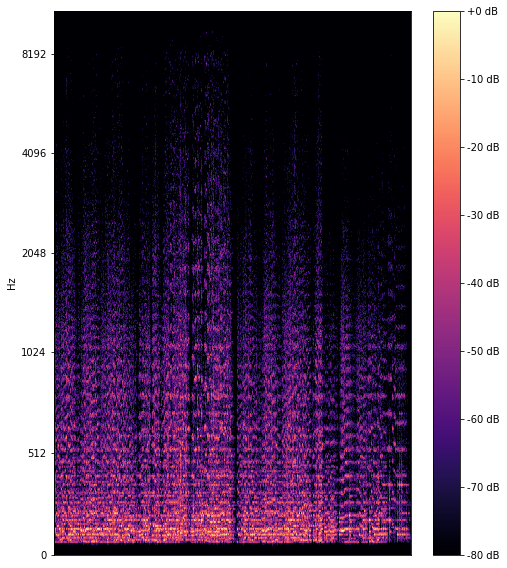

In [3]:
os.chdir('/home/student/Downloads/new_violin_viola/all/viola/combined_test')
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/all/viola/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        #temp = x/x.max()  #normalization
        #S = librosa.feature.melspectrogram(temp, sr=sr, n_mels=128)  # 128 mel bands
        #mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)
        #tempList = list(np.mean(mfcc,1))
        #tempList1 = list(np.std(mfcc,1))
       
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/all/test_combined/viola/{f_name[:-4]}.png')
        
        
os.chdir('/home/student/Downloads/new_violin_viola/all/violin/combined_test')  
for f_name in os.listdir('/home/student/Downloads/new_violin_viola/all/violin/combined_test'):
    if f_name.endswith('.mp3') or f_name.endswith('.wav'):
        print(f_name)
        
        y, sr = librosa.load(f_name)
        #mel = librosa.feature.melspectrogram(y=y,sr=sr)
        X = librosa.stft(y)
        S = librosa.amplitude_to_db(X, ref=np.max)
        plt. clf()
        fig = plt.figure(figsize=(8.0, 10.0)) #for full size graph download
        librosa.display.specshow(S, y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(f'/home/student/Downloads/new_violin_viola_dl/all/test_combined/violin/{f_name[:-4]}.png')


    

In [2]:
train_dir = "/home/student/Downloads/new_violin_viola_dl/all/train_combined/"
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator =train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='training')


validation_generator=train_data.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=2,subset='validation')

testing_dir = "/home/student/Downloads/new_violin_viola_dl/all/test_combined/"
testing_data = ImageDataGenerator(rescale=1./255)
testing_generator = testing_data.flow_from_directory(testing_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=2)


Found 68 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [3]:
def GenreModel(input_shape = (288,432,4),classes=2):
  
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)
  
  

  X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

In [6]:
import keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

  
model = GenreModel(input_shape=(288,432,4),classes=2)
opt = Adam(learning_rate=0.0015)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy', 'mae']) 

history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator)

Epoch 1/30
34/34 [==============================] - 2s 48ms/step - loss: 3.0945 - accuracy: 0.6324 - mae: 0.3866 - val_loss: 1.7418 - val_accuracy: 0.5000 - val_mae: 0.5005
Epoch 2/30
34/34 [==============================] - 1s 21ms/step - loss: 1.2091 - accuracy: 0.6324 - mae: 0.3770 - val_loss: 2.7982 - val_accuracy: 0.5000 - val_mae: 0.5000
Epoch 3/30
34/34 [==============================] - 1s 22ms/step - loss: 1.5911 - accuracy: 0.6324 - mae: 0.3671 - val_loss: 2.9838 - val_accuracy: 0.5000 - val_mae: 0.5000
Epoch 4/30
34/34 [==============================] - 1s 21ms/step - loss: 1.5581 - accuracy: 0.5735 - mae: 0.4307 - val_loss: 0.0391 - val_accuracy: 0.5000 - val_mae: 0.4996
Epoch 5/30
34/34 [==============================] - 1s 23ms/step - loss: 2.3324 - accuracy: 0.5000 - mae: 0.5138 - val_loss: 2.4935 - val_accuracy: 0.5000 - val_mae: 0.4985
Epoch 6/30
34/34 [==============================] - 1s 23ms/step - loss: 0.5788 - accuracy: 0.7647 - mae: 0.2729 - val_loss: 2.1918 - v

In [7]:
model.evaluate(testing_generator)

18/18 [==============================] - 0s 22ms/step


[1.6757769584655762, 0.5833333134651184, 0.4565349221229553]